# **Biblioteki**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import sklearn
import warnings
import scipy
from scipy import stats
from sklearn.preprocessing import scale
from scipy.stats import yeojohnson, boxcox

# **Przygotowanie danych**

Dane do zadania dotyczą nieruchomości i zostały pobrane ze strony Kaggle:

https://www.kaggle.com/datasets/godofprogramming/ameshousing



In [5]:
# Wczytanie danych

df = pd.read_csv('AmesHousing.csv')
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [6]:
# Podstawowe informacje na temat zbioru danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

**Na początku koniecznym jest dokonanie selekcji, interesują nas jedynie dane mierzalne (liczbowe), które są dodatnie**


In [9]:
# wybieramy wszystkie typy danych z wyjątkiem typu object
df = df.select_dtypes(exclude = ['object'])

# usuwamy kolumny, w których występują wartości niedodatnie
for col in df.columns:
  df = df.sort_values(by = col)
  if df[col].iloc[0] <= 0:
    df.drop(col, axis = 1, inplace = True)

# następnie usuwamy brakujące wartości i resetujemy indeksy
df = df.dropna()
df = df.reset_index(drop = True)

In [10]:
# Do naszego zbioru dodajemy zmienną, która określa wiek domu (różnica między rokiem sprzedaży a rokiem budowy)

df['age'] =  df['Yr Sold'] - df['Year Built']
df = df[df['age'] > 0]       # usuwamy ewentualne błędne dane, w których rok budowy jest późniejszy niż rok sprzedaży
df

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,Gr Liv Area,TotRms AbvGrd,Garage Yr Blt,Mo Sold,Yr Sold,SalePrice,age
0,1720,528181060,120,34.0,4590,8,5,2006,2006,1554,1554,6,2006.0,8,2007,209500,1
1,2405,528180080,120,48.0,5911,9,5,2005,2005,1565,1565,6,2005.0,3,2006,282500,1
2,2827,908186070,180,35.0,3675,6,5,2005,2006,1072,1072,5,2005.0,6,2006,140000,1
3,1695,528108160,60,109.0,14154,7,5,2006,2006,1071,2172,9,2006.0,8,2007,280000,1
4,2763,906394060,60,78.0,9316,7,5,2005,2005,784,1596,6,2005.0,6,2006,181000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,1996,902304040,70,90.0,9900,6,4,1880,1950,1178,2210,8,1930.0,5,2007,117500,127
2175,1998,902330090,75,75.0,13500,7,8,1879,1987,1312,2454,8,1950.0,2,2007,185000,128
2176,1307,902207220,75,87.0,18386,7,9,1880,2002,1675,3493,10,2003.0,5,2008,295000,128
2177,717,902326030,70,65.0,11700,7,7,1880,2003,1320,2640,8,1950.0,5,2009,265979,129


**Do analizy wybierane zostało kilka zmiennych, których rozkłady będziemy transformować do rozkładów normalnych.**

In [11]:
age = df['age']                                     # wiek domu
first_flr = df['1st Flr SF']                        # powierzchnia parteru
l_Frontage = df['Lot Frontage']                     # frontowa linia działki
l_Area = df['Lot Area']                             # powierzchnia działki

# **BADANIE NORMALNOŚCI ROZKŁADÓW - NORMALIZACJA ZMIENNYCH**

## Określenie czy rozkład jest normalny

Sposoby badania czy rozkład jest normalny:

1. analiza histogramu,

2. oblicznie skośności oraz kurtozy,

3. analiza wykresów P-P,

4. testy normalności.

### **Histogram**

Proszę skomentować wykres histogramu oraz  wykres pudełkowy.

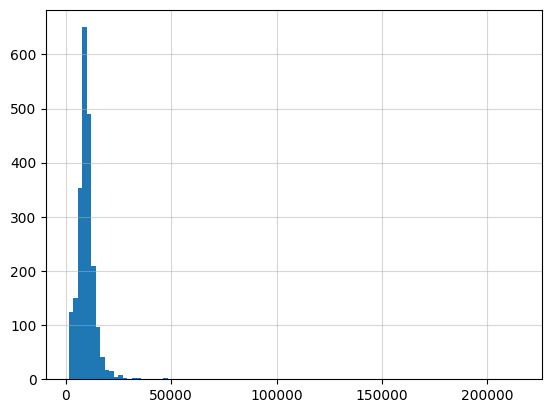

In [12]:
# Histogram

plt.hist(l_Area, bins = 100)
plt.grid(alpha = 0.5)
plt.show()

Kwartyle dzielą wszystkie nasze obserwacje na cztery równe co do liczności obserwacji grupy. Kwartyl pierwszy (Q1)  dzieli obserwacje w stosunku 25% - 75%, co oznacza, że 25% obserwacji jest niższa bądź równa wartości I-ego kwartyla, a 75% obserwacji jest równa bądź większa niż wartość I-ego kwartyla. Kwartyl drugi (Q2), inaczej zwany medianą dzieli obserwacje na dwie części w stosunku 50%-50%. Kwartyl trzeci (Q3) dzieli obserwacje w stosunku 75% - 25%, co oznacza, że 75% obserwacji jest niższa bądź równa wartości III-ego kwartyla, a 25% obserwacji jest równa bądź większa niż wartość III-ego kwartyla.

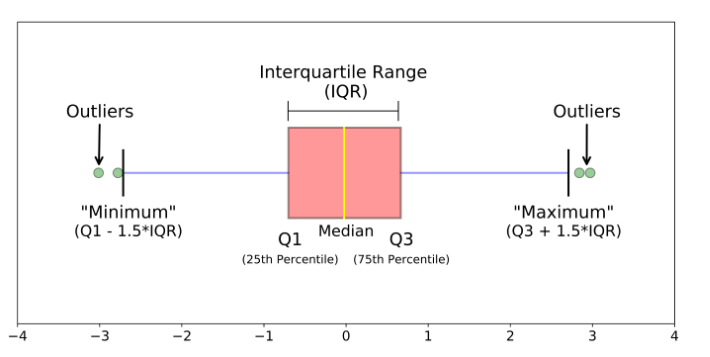

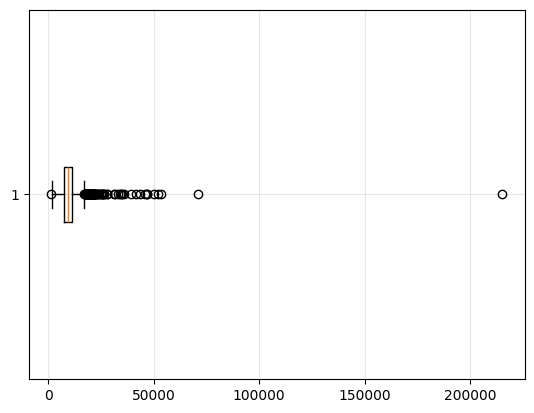

In [13]:
# boxplot
plt.boxplot(l_Area, vert=False)
plt.grid(alpha=0.3)
plt.show()

**Komentarz:**

### **Skośność i kurtoza**

Kurtoza i skośność są to statystyki charakteryzujące kształt i symetrię rozkładu. Im bliżej wartości tych statystyk są bliskie zeru tym rozkład bardziej przypomina rozkład normalny.

UWAGA: w Pythonie na wartość kurtozy nałożona jest poprawka Fishera (od wyliczonej wartości kurtozy odejmowana jest 3), dlatego w innych środowiskach można spotkać się z tym, że wartość kurtozy dla rozkładu normalnego wynosi 3.

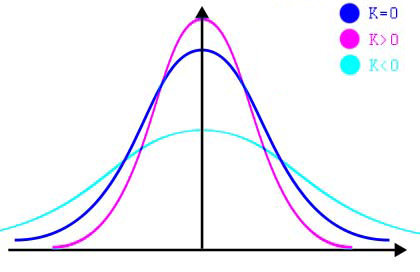

**Zadanie**

Proszę wyznaczyć skośność i kurtozę dla zmiennej l_Area i skomentować wyniki.


skosnosc = skew(x)

kurtoza = kurtosis(x, fisher = True)

In [17]:
# Rozwiązanie
skosnosc = skew(l_Area)
kurtoza = kurtosis(l_Area, fisher = True)
print(skosnosc, kurtoza)

15.849807894188993 462.4487026462261


**Komentarz:**

### **Wykres P-P**

Na wykresie P-P narysowna jest linia, jeżeli punkty pomiarowe układają sie wzdłuż niej, to można podjrzewać że dane mają rozkład normalny, natomiast jeżeli odchylają się od tej prostej to  rozkład badanych danych nie jest normalny.

Proszę skomentować wykres.


((array([-3.41573314, -3.16627872, -3.02800671, ...,  3.02800671,
          3.16627872,  3.41573314]),
  array([  1300,   1477,   1484, ...,  53504,  70761, 215245], dtype=int64)),
 (4507.15677396128, 9740.409821018817, 0.6915381168169557))

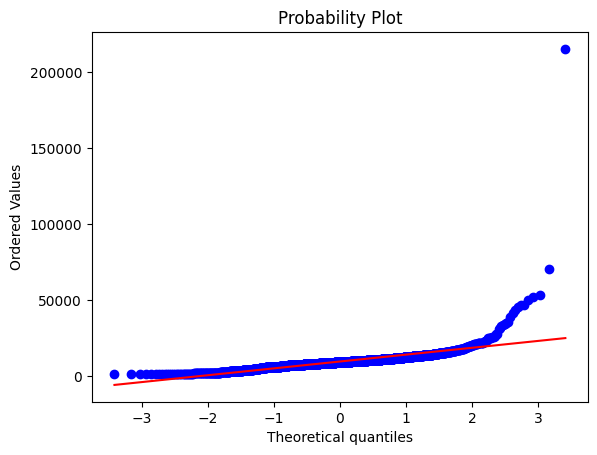

In [18]:
scipy.stats.probplot(l_Area, sparams=(), dist='norm', fit=True, plot=plt, rvalue=False)

**Komentarz:**

### **Testy normalności**

**Przypomnienie**

Wykonując testy normalności zawsze musimy sformułować hipotezę zerową (H0) oraz hipotezę alternatywną (H1) - która jest odpowiednim zaprzeczeniem H0. Natępnie należy określić poziom istotności testu, dla założonego alfa: <0.001;0.1>, zwykle alfa=0.05.

**Zawsze trzeba zapisać obie hipotezy przed przystąpieniem do ich sprawdzania**

 Na podstawie wartości p można wyciągnąć następujące wnioski:

1) jeżeli p < alfa, należy PRZYJĄĆ H1 i ODRZUCIĆ H0,

2) jeżeli p > alfa, NIE MA PODSTAW DO ODRZUCENIA H0.

**H0 NIE MOŻE ZOSTAĆ PRZYJĘTE!**

W PYTHONIE można przeprowadzić test normalności przy pomocy funkcji: **stats.normaltest(x**), test ten pozwala zbadać normalność rozkładu na podstawie wartości skośności oraz kurtozy. Bada on hipotezę zerową, że próbki pochodzą z rozkładu normalnego.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html





**Zadanie**

Na poziomie istotności 0.05 proszę sprawdzić czy rozkład powierzchni (l_Area) może być opisany rozkładem normalny.




**Hipotezy:**

H0: układ może być opisany rozkładem normalnym

H1: Układ nie może być opisany rozkładem normalnym


In [26]:
# Rozwiązanie
p = scipy.stats.normaltest(l_Area)
print(p)

NormaltestResult(statistic=4396.93540505057, pvalue=0.0)


**ODP:**

### **Transformacja rozkładów:**

W rzeczywistości większości danych nie możemy opisać rozkładem normalnym, możemy jednak próbować je transformować (przekształcać), tak aby spełniały kryteria normalności rozkładu.

Istnieją różne metody na znormalizowania
rozkładu:

1) transformacja odwrotna (1/x, x != 0),

2) transformacja pierwiastkowa (x**(1/2), x>0)

3) transformacja wykładnicza (x** lambda),

4) transformacja logarytmiczna (np.log(x), x>0),

5) transformacja Boxa-Coxa (boxcox(x), x>0), https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html ,

6) transformacja Yeo-Johnsona (yeojohnson(x)), https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html .

Transformacja Boxa-Coxa to specjalny przypadek (dla dodatnich danych) transformacji Yeo-Johnsona.

**Proszę uzupełnić hipotezy dotyczące normalności i skomentować wyniki.**

Poziom istotnośi: alfa = 0.05

**Hipotezy:**

H0: układ może być normalny

H1: układ nie jest normalny


test normalności - jeżeli mniejsze od alfa możemy odrzucić H0, więc H1 jest prawdziwe



In [27]:
# Transformacja odwrotna

l_Area_t_odw = 1/l_Area
print('Transformacja odwrotna')
print(stats.normaltest(l_Area_t_odw))

# Transformacja pierwiastkowa

l_Area_t_pierw = np.sqrt(l_Area)
print('Transformacja pierwiastkowa')
print(stats.normaltest(l_Area_t_pierw))

# Transformacja logarytmiczna

l_Area_t_log = np.log(l_Area)
print('Transformacja logarytmiczna')
print(stats.normaltest(l_Area_t_log))

# Transformacja wykładnicza

# sprawdzamy dla jakiego wykładnika, wartość p jest największa

p_val = []
lam = []
for i in range(1,20):
  l_Area_t_wykl = l_Area**i
  stat, p = stats.normaltest(l_Area_t_wykl)
  p_val.append(p)
  lam.append(i)

print('Transformacja wykładnicza')
max_p = max(p_val)
index = p_val.index(max_p) + 1
print('wartosc_p',max_p, ' dla wykładnika:', index)

# Transformacja Boxa-Coxa

l_Area_t_bc,lm = boxcox(l_Area)
print('Transformacja Boxa-Coxa')
print(stats.normaltest(l_Area_t_bc))

# transformacja Yeo-Johnsona

l_Area_t_yj,lm = yeojohnson(l_Area)
print('Transformacja Yeo-Johnsona')
print(stats.normaltest(l_Area_t_yj))

Transformacja odwrotna
NormaltestResult(statistic=1488.6820068804725, pvalue=0.0)
Transformacja pierwiastkowa
NormaltestResult(statistic=1458.3129826133281, pvalue=0.0)
Transformacja logarytmiczna
NormaltestResult(statistic=345.6996701435644, pvalue=8.555993194090714e-76)
Transformacja wykładnicza
wartosc_p 3.79320768296308e-13  dla wykładnika: 16
Transformacja Boxa-Coxa
NormaltestResult(statistic=304.8984195032527, pvalue=6.196542523329343e-67)
Transformacja Yeo-Johnsona
NormaltestResult(statistic=304.824788451314, pvalue=6.428922851077447e-67)


**ODP:**

Nie zawsze możliwa jest prosta transformacja danych. Na podstawie wykresu pudełkowego można stwierdzić, że istnieje wiele wartości odstających dlatego teraz usuniemy je i jeszcze raz przekształcimy dane.

Dane odstające usuwane są na podstawie kwartyli.

UWAGA: Generalnie usuwanie elementów może mieć miejsce tylko i wyłącznie wtedy, gdy mamy podejrzenie, że dane te są błędne. W przeciwnym przypadku wszystkie dane są ważne i nie wolno się ich pozbywać.

In [28]:
l_Area_2 = l_Area.copy()
(Q1, Q3)=np.percentile(l_Area_2,[25,75])

IQR=Q3-Q1

dQ=Q1-(1.5*IQR)
gQ=Q3+(1.5*IQR)

l_Area_2.loc[l_Area_2 > gQ] = np.nan
l_Area_2 = l_Area_2.dropna(axis = 0)

In [29]:
# sprawdzenie normalności rozkładu po usunięciu odstających wartości

stats.normaltest(l_Area_2)

NormaltestResult(statistic=10.89539328170174, pvalue=0.004306212029168278)

**ODP:**

**Zadanie:**

Proszę wykonać transformacje i sprawdzić normalność otrzymanych rozkładów.

In [ ]:
# Rozwiązanie


**ODP:**

**Proszę narysować i skomentować wykres P-P (odnosząc się do wykresu P-P przed transformacją):**

In [ ]:
# Rozwiązanie


**Komentarz:**

**Teraz przeanalizujemy zmienną określającą wiek domu w momencie sprzedaży.**

Proszę skomentować wyniki.

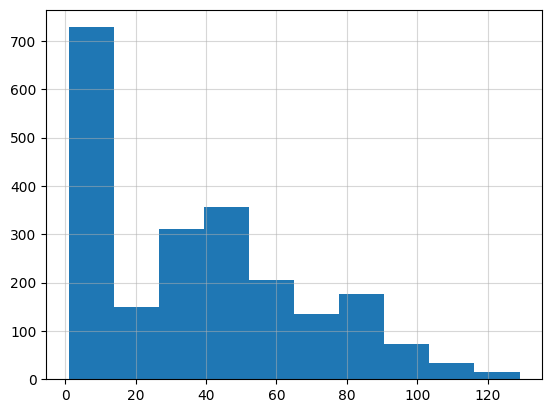

In [45]:
# Histogram

plt.hist(age, bins = 10)
plt.grid(alpha = 0.5)
plt.show()

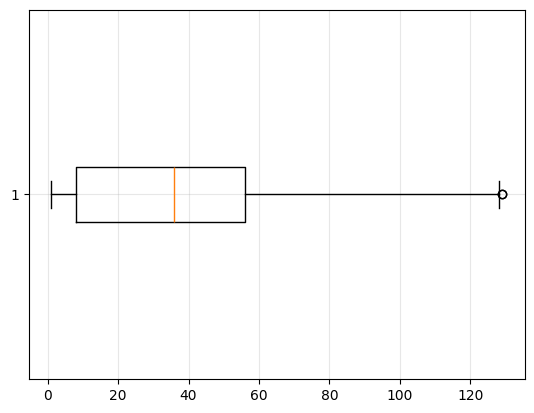

In [46]:
# Boxplot

plt.boxplot(age, vert=False)
plt.grid(alpha=0.3)
plt.show()

**Komentarz:**

In [47]:
# Skośność i kurtoza

skosnosc = skew(age)
kurtoza = kurtosis(age, fisher = True)

print('skosnosc wynosi: ', skosnosc)
print('kurtoza wynosi: ', kurtoza)

skosnosc wynosi:  0.5472281429752639
kurtoza wynosi:  -0.5987939163195093


**Komentarz:**

((array([-3.41573314, -3.16627872, -3.02800671, ...,  3.02800671,
          3.16627872,  3.41573314]),
  array([  1,   1,   1, ..., 128, 129, 129], dtype=int64)),
 (29.37649318678824, 37.40752638825148, 0.9622626685949893))

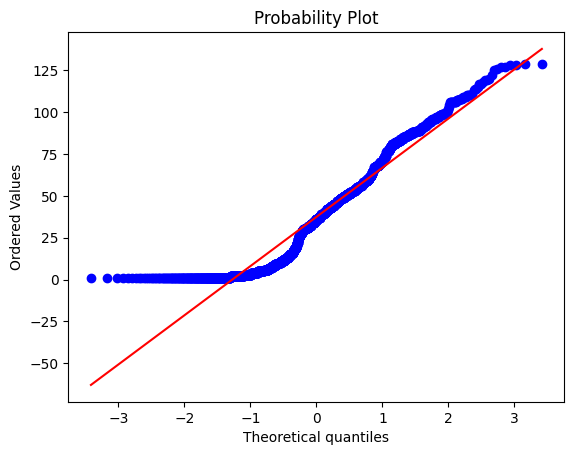

In [48]:
# Wykres P-P

scipy.stats.probplot(age, sparams=(), dist='norm', fit=True, plot=plt, rvalue=False)

**Komentarz:**

**Hipotezy:**

H0:

H1:


In [49]:
# Test normalności

stats.normaltest(age)

NormaltestResult(statistic=165.05962139354108, pvalue=1.4379991252882407e-36)

**ODP:**

In [50]:
# Transformacja odwrotna

age_t_odw = 1/age
print('Transformacja odwrotna')
print(stats.normaltest(age_t_odw))

# Transformacja pierwiastkowa

age_t_pierw = np.sqrt(age)
print('Transformacja pierwiastkowa')
print(stats.normaltest(age_t_pierw))

# Transformacja logarytmiczna

age_t_log = np.log(age)
print('Transformacja logarytmiczna')
print(stats.normaltest(age_t_log))

# Transformacja wykładnicza

# sprawdzamy dla jakiego wykładnika, wartość p jest największa

p_val = []
lam = []
for i in range(1,20):
  age_t_wykl = age**i
  stat, p = stats.normaltest(age_t_wykl)
  p_val.append(p)
  lam.append(i)

print('Transformacja wykładnicza')
max_p = max(p_val)
index = p_val.index(max_p) + 1
print('wartosc_p',max_p, ' dla wykładnika:', index)

# Transformacja Boxa-Coxa

age_t_bc,lm = boxcox(age)
print('Transformacja Boxa-Coxa')
print(stats.normaltest(age_t_bc))

# transformacja Yeo-Johnsona

age_t_yj,lm = yeojohnson(age)
print('Transformacja Yeo-Johnsona')
print(stats.normaltest(age_t_yj))

Transformacja odwrotna
NormaltestResult(statistic=891.7630374055353, pvalue=2.2704756297674718e-194)
Transformacja pierwiastkowa
NormaltestResult(statistic=1472.9744192330022, pvalue=0.0)
Transformacja logarytmiczna
NormaltestResult(statistic=251.83258661007022, pvalue=2.066562935529255e-55)
Transformacja wykładnicza
wartosc_p 0.8493696457695584  dla wykładnika: 16
Transformacja Boxa-Coxa
NormaltestResult(statistic=1304.97846805791, pvalue=4.2415653242192494e-284)
Transformacja Yeo-Johnsona
NormaltestResult(statistic=1760.3431701023926, pvalue=0.0)


**ODP:**

((array([-3.41573314, -3.16627872, -3.02800671, ...,  3.02800671,
          3.16627872,  3.41573314]),
  array([-8839661442693215359, -8839661442693215359, -8839661442693215359,
         ...,  9207001867161239552,  9207001867161239552,
          9207001867161239552], dtype=int64)),
 (3.985672621192533e+18, 2.1760802040132813e+17, 0.970630449061019))

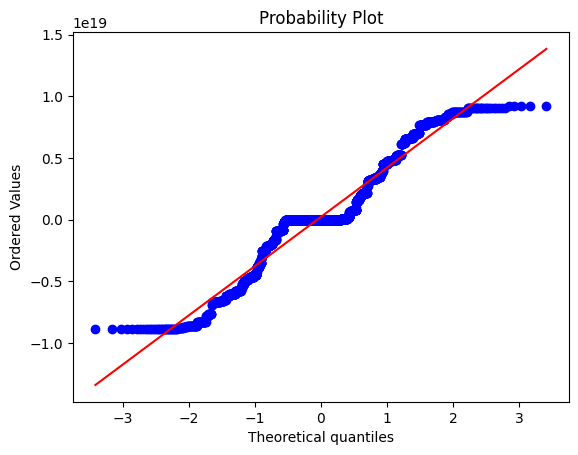

In [51]:
# Wykres P-P
age_t = age ** index
scipy.stats.probplot(age_t, sparams=(), dist='norm', fit=True, plot=plt, rvalue=False)


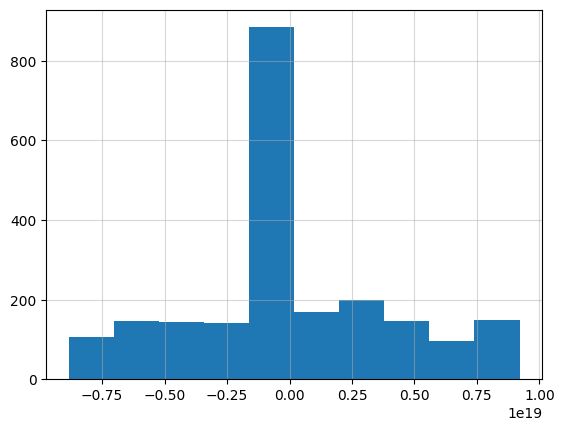

In [52]:
plt.hist(age_t, bins = 10)
plt.grid(alpha = 0.5)
plt.show()

**KOMENTARZ:**

W obu przypadkach udało się tak przekształcić dane aby ich rozkład spełniał kryteria rozkładu normalnego, **należy pamiętać jednak o tym, że nie zawsze jest to możliwe.**

### **Zadanie:**

Na poziomie istotności 0.05 proszę sprawdzić normalność, a następnie przekształcić dane: first_flr oraz l_Frontage. Na konću proszę narysować i skomentować wykresy P-P dla przekształconych danych (dla najlepszej transformacji). Wszystkie wyniki należy skomentować. Które transformacje umożliwiły normalizację danych?

Dodatkowo proszę narysować rozkłady przed i po transformacji.

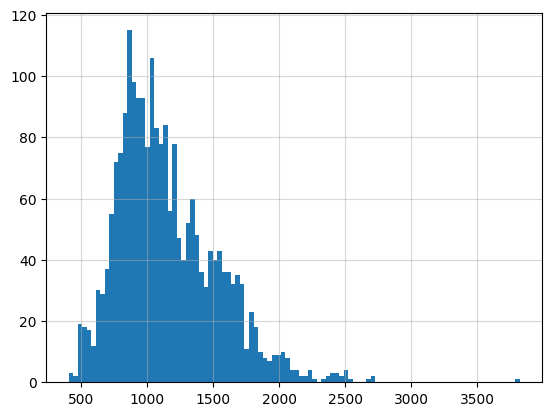

In [34]:
# Rozwiązanie:

# narysowanie rozkładu ...
plt.hist(first_flr, bins = 100)
plt.grid(alpha = 0.5)
plt.show()


In [41]:

# skośność i kurtoza ...
skosnosc = skew(first_flr)
kurtoza = kurtosis(first_flr, fisher = True)
print(skosnosc, kurtoza)


0.9624223990822571 1.6970815696580273


((array([-3.41573314, -3.16627872, -3.02800671, ...,  3.02800671,
          3.16627872,  3.41573314]),
  array([ 407,  432,  438, ..., 2696, 2726, 3820], dtype=int64)),
 (367.0308989906345, 1151.3363928407528, 0.9742793739431059))

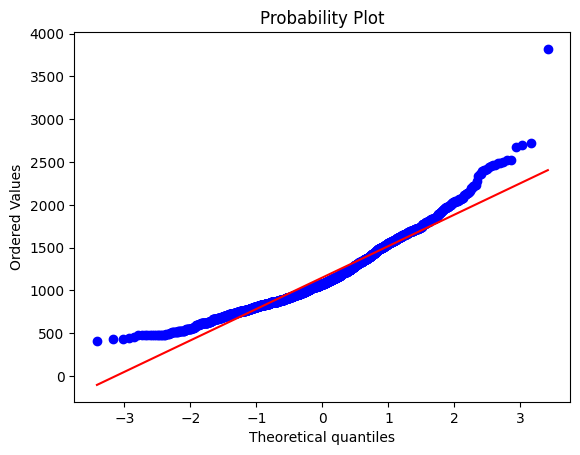

In [42]:

# wykres P-P ...
scipy.stats.probplot(first_flr, sparams=(), dist='norm', fit=True, plot=plt, rvalue=False)


In [43]:

# test normalności (hipotezy)...
scipy.stats.normaltest(first_flr)


NormaltestResult(statistic=331.7593570711312, pvalue=9.106908059962773e-73)

In [53]:

# transformacje...
first_flr_odw = 1/first_flr
print('Transformacja odwrotna')
print(stats.normaltest(first_flr_odw))


age_t_pierw = np.sqrt(first_flr)
print('Transformacja pierwiastkowa')
print(stats.normaltest(age_t_pierw))

# Transformacja logarytmiczna

age_t_log = np.log(first_flr)
print('Transformacja logarytmiczna')
print(stats.normaltest(age_t_log))

# Transformacja wykładnicza

# sprawdzamy dla jakiego wykładnika, wartość p jest największa

p_val = []
lam = []
for i in range(1,20):
  age_t_wykl = first_flr**i
  stat, p = stats.normaltest(age_t_wykl)
  p_val.append(p)
  lam.append(i)

print('Transformacja wykładnicza')
max_p = max(p_val)
index = p_val.index(max_p) + 1
print('wartosc_p',max_p, ' dla wykładnika:', index)

# Transformacja Boxa-Coxa

age_t_bc,lm = boxcox(first_flr)
print('Transformacja Boxa-Coxa')
print(stats.normaltest(age_t_bc))

# transformacja Yeo-Johnsona

age_t_yj,lm = yeojohnson(first_flr)
print('Transformacja Yeo-Johnsona')
print(stats.normaltest(age_t_yj))
# sprawdzenie...


Transformacja odwrotna
NormaltestResult(statistic=317.091242640715, pvalue=1.394798689463696e-69)
Transformacja pierwiastkowa
NormaltestResult(statistic=77.04612592619273, pvalue=1.8605713496786296e-17)
Transformacja logarytmiczna
NormaltestResult(statistic=1.1562969905105254, pvalue=0.5609359813255764)
Transformacja wykładnicza
wartosc_p 3.703384753363323e-32  dla wykładnika: 6
Transformacja Boxa-Coxa
NormaltestResult(statistic=1.0466904317876062, pvalue=0.5925350711597579)
Transformacja Yeo-Johnsona
NormaltestResult(statistic=1.0542816091517626, pvalue=0.5902903145312782)
